In [1]:
import pandas as pd
import numpy as np
import formula1 as f1

In [2]:
df = f1.get_qualifying_result(2021, 1)

In [20]:
stats_2021 = pd.DataFrame()
for i in range(1, 23):
    quali = f1.get_qualifying_result(2021, i)
    race = f1.get_race_result(2021, i)
    quali.rename(columns={'position': 'qualipos'}, inplace=True)
    quali['race'] = i
    quali = quali[['race', 'driverID', 'qualipos']]
    quali = quali.sort_values('driverID')
    quali = quali.set_index('driverID')


    race['race'] = i
    race.rename(columns={'position': 'racepos'}, inplace=True)
    race = race[['race', 'driverID', 'racepos']]
    race = race.sort_values('driverID')
    race = race.set_index('driverID')

    stats_2021 = stats_2021.append(quali)
    stats_2021['racepos'] = race['racepos']

In [23]:

stats_2021 = stats_2021.reset_index()
stats_2021 = stats_2021[stats_2021.driverID != 'mazepin']
stats_2021 = stats_2021[stats_2021.driverID != 'kubica']
stats_2021['year'] = 2021


In [27]:
stats_2020 = pd.DataFrame()
for i in range(1, 18):
    quali = f1.get_qualifying_result(2020, i)
    race = f1.get_race_result(2020, i)
    quali.rename(columns={'position': 'qualipos'}, inplace=True)
    quali['race'] = i
    quali = quali[['race', 'driverID', 'qualipos']]
    quali = quali.sort_values('driverID')
    quali = quali.set_index('driverID')


    race['race'] = i
    race.rename(columns={'position': 'racepos'}, inplace=True)
    race = race[['race', 'driverID', 'racepos']]
    race = race.sort_values('driverID')
    race = race.set_index('driverID')

    stats_2020 = stats_2020.append(quali)
    stats_2020['racepos'] = race['racepos']

stats_2020 = stats_2020.reset_index()
stats_2020 = stats_2020[stats_2020.driverID != 'mazepin']
stats_2020 = stats_2020[stats_2020.driverID != 'kubica']
stats_2020['year'] = 2020


In [29]:
stats_2019 = pd.DataFrame()
for i in range(1, 22):
    quali = f1.get_qualifying_result(2019, i)
    race = f1.get_race_result(2019, i)
    quali.rename(columns={'position': 'qualipos'}, inplace=True)
    quali['race'] = i
    quali = quali[['race', 'driverID', 'qualipos']]
    quali = quali.sort_values('driverID')
    quali = quali.set_index('driverID')


    race['race'] = i
    race.rename(columns={'position': 'racepos'}, inplace=True)
    race = race[['race', 'driverID', 'racepos']]
    race = race.sort_values('driverID')
    race = race.set_index('driverID')

    stats_2019 = stats_2019.append(quali)
    stats_2019['racepos'] = race['racepos']

stats_2019 = stats_2019.reset_index()
stats_2019 = stats_2019[stats_2019.driverID != 'mazepin']
stats_2019 = stats_2019[stats_2019.driverID != 'kubica']
stats_2019['year'] = 2019

In [31]:
stats_2018 = pd.DataFrame()
for i in range(1, 22):
    quali = f1.get_qualifying_result(2019, i)
    race = f1.get_race_result(2019, i)
    quali.rename(columns={'position': 'qualipos'}, inplace=True)
    quali['race'] = i
    quali = quali[['race', 'driverID', 'qualipos']]
    quali = quali.sort_values('driverID')
    quali = quali.set_index('driverID')


    race['race'] = i
    race.rename(columns={'position': 'racepos'}, inplace=True)
    race = race[['race', 'driverID', 'racepos']]
    race = race.sort_values('driverID')
    race = race.set_index('driverID')

    stats_2018 = stats_2018.append(quali)
    stats_2018['racepos'] = race['racepos']

stats_2018 = stats_2018.reset_index()
stats_2018 = stats_2018[stats_2018.driverID != 'mazepin']
stats_2018 = stats_2018[stats_2018.driverID != 'kubica']
stats_2018['year'] = 2018

In [35]:
master = pd.concat([stats_2018, stats_2019, stats_2020, stats_2021], ignore_index=True)

In [41]:
master = master[master.driverID != 'grosjean']
master = master[master.driverID != 'hulkenberg']
master = master[master.driverID != 'aitken']
print(master[master['qualipos'].isnull()])

Empty DataFrame
Columns: [driverID, race, qualipos, racepos, year, index]
Index: []


In [45]:
master.to_csv('qualirace.csv')

In [42]:
x = master['qualipos'].astype(int)
y = master['racepos'].astype(int)

In [46]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from scipy.stats import linregress


0.637871131869857 3.4923315259582868 0.6370750599910425 1.8311134476203575e-165 0.020309603756044087
0.41


/var/folders/ry/nqgxl42n3vjg1sj6zlxsr0rr0000gn/T/ipykernel_1439/3578360429.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  poly_model.fit(x[:, np.newaxis], y)


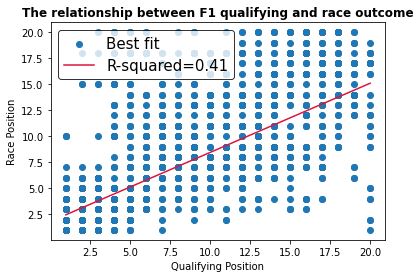

In [47]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 2)
yfit = poly_model.predict(xfit[:, np.newaxis])

# Plotting data
plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson')
plt.xlabel('Qualifying Position')
plt.ylabel('Race Position')

# Additional statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_squared="{:.2f}".format(r_value**2)

# Formatting
plt.legend(('Best fit', 'R-squared={}'.format(r_squared)), fontsize=15, loc="upper left", borderpad=0.4, edgecolor="black")
plt.title("The relationship between F1 qualifying and race outcome", fontweight="bold")

print(slope, intercept, r_value, p_value, std_err)
print(r_squared)